# Analysing imdb database using RNN

In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Embedding, Dense
from keras.layers import SimpleRNN

import matplotlib.pyplot as plt

#### Parameters

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

#### Load data

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


#### Each text has a different lenght:

In [5]:
[len(i) for i in  input_train][:15]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109]

#### So we need to pad

In [6]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Pad sequences (samples x time)


In [7]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Build the RNN model

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/datalinux/giudice/software/anaconda/anaconda3/envs/deeplearning_theano/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/datalinux/giudice/software/anaconda/anaconda3/envs/deeplearning_theano/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/datalinux/giudice/s

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 300s 15ms/step - loss: 0.6675 - acc: 0.5802 - val_loss: 0.5561 - val_acc: 0.7434
Epoch 2/10
20000/20000 [==============================] - 251s 13ms/step - loss: 0.4511 - acc: 0.8016 - val_loss: 0.3909 - val_acc: 0.8374
Epoch 3/10
20000/20000 [==============================] - 238s 12ms/step - loss: 0.3112 - acc: 0.8732 - val_loss: 0.3659 - val_acc: 0.8548
Epoch 4/10
20000/20000 [==============================] - 251s 13ms/step - loss: 0.2425 - acc: 0.9047 - val_loss: 0.4468 - val_acc: 0.8094
Epoch 5/10
20000/20000 [==============================] - 246s 12ms/step - loss: 0.1896 - acc: 0.9294 - val_loss: 0.4180 - val_acc: 0.8272
Epoch 6/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.1320 - acc: 0.9532 - val_loss: 0.4732 - val_acc: 0.8356
Epoch 7/10
20000/20000 [==============================] - 244s 12ms/step - loss: 0.1146 - acc: 0.9585 - val_loss: 0.5

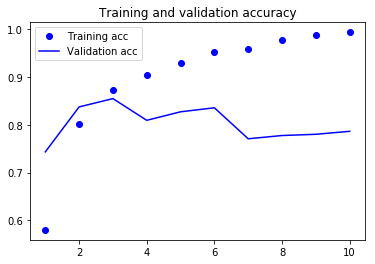

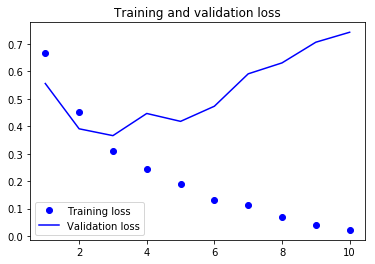

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#### Evaluate on the test set

In [14]:
results = model.evaluate(input_test, y_test)

25000/25000 [==============================] - 239s 10ms/step


In [15]:
results

[0.7338061304378509, 0.78668]

#### Prediction

In [17]:
model.predict(input_test)

/datalinux/giudice/software/anaconda/anaconda3/envs/deeplearning_theano/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"


array([[0.01244268],
       [0.90532243],
       [0.18392064],
       ...,
       [0.8833717 ],
       [0.04298646],
       [0.01258687]], dtype=float32)